In [25]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
# Function to compute mean and center data
def center_data(X):
    mean = np.mean(X, axis=0)
    X_centered = X - mean
    return X_centered, mean

In [27]:
# Function to compute covariance matrix
def compute_covariance_matrix(X):
    return np.cov(X, rowvar=False)

In [28]:
# Function to perform PCA
def perform_pca(X, n_components):
    # Center the data
    X_centered, mean = center_data(X)
    
    # Compute the covariance matrix
    covariance_matrix = compute_covariance_matrix(X_centered)
    
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Select the top n_components eigenvectors
    principal_components = eigenvectors[:, :n_components]
    
    # Project data onto principal components
    X_reduced = np.dot(X_centered, principal_components)
    
    return X_reduced, principal_components, mean, eigenvalues


In [29]:
# Function to reconstruct data from reduced dimensions
def reconstruct_data(X_reduced, principal_components, mean):
    return np.dot(X_reduced, principal_components.T) + mean


In [30]:
# Generate a synthetic dataset (optional)
from sklearn.datasets import make_blobs


In [31]:
# Create a 3D dataset with clusters
X, y = make_blobs(n_samples=300, centers=3, n_features=3, random_state=42)


In [32]:
# Visualize the original 3D dataset
from mpl_toolkits.mplot3d import Axes3D


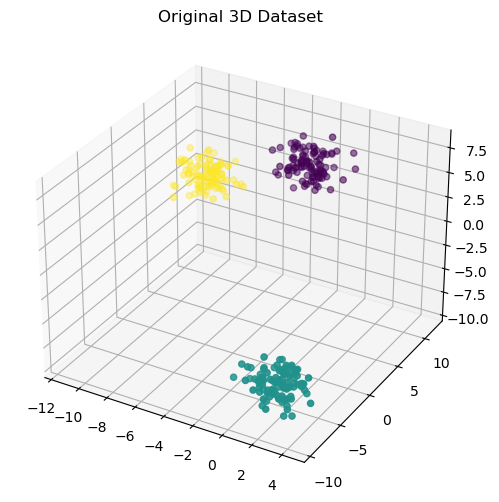

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
ax.set_title("Original 3D Dataset")
plt.show()


In [34]:
# Perform PCA to reduce to 2 dimensions
n_components = 2
X_reduced, principal_components, mean, eigenvalues = perform_pca(X, n_components)


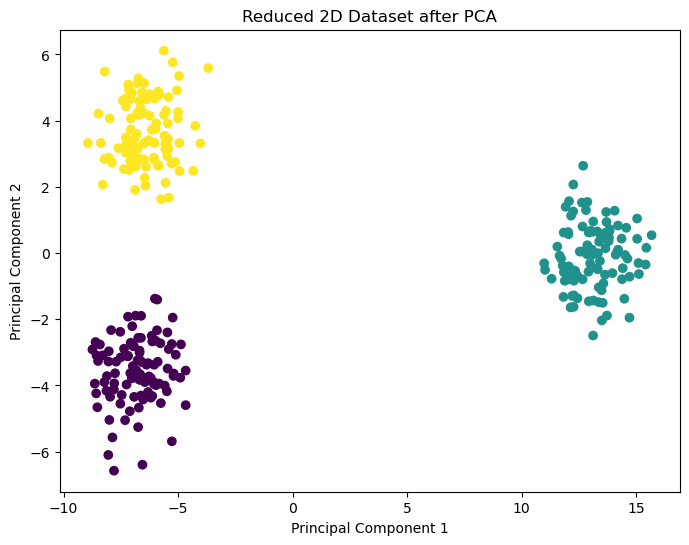

In [35]:
# Visualize the reduced 2D dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis')
plt.title("Reduced 2D Dataset after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [36]:
# Explained Variance
explained_variance = eigenvalues[:n_components] / np.sum(eigenvalues)
print(f"Explained Variance by {n_components} components: {explained_variance.sum():.2f}")


Explained Variance by 2 components: 0.99
